In [1]:
#https://github.com/nla-group/classix
#pip install classixclustering

  Created wheel for classixclustering: filename=classixclustering-0.7.7-py3-none-any.whl size=34951 sha256=c799f72fb26279f3c0a81b547dc459ea9e8c86e26ec94032c55751226fee7545
  Stored in directory: c:\users\mm17b2k\appdata\local\pip\cache\wheels\c6\c5\d2\9525496e1747e15622d6d95548670433ab54f12df53801bd25
Successfully built classixclustering
Note: you may need to restart the kernel to use updated packages.


In [8]:
from sklearn import datasets
from classix import CLASSIX
import numpy as np
import matplotlib.pyplot as plt
import random
import os
import pandas as pd
from sklearn.cluster import KMeans


In [9]:
mus = np.load(r"C:\Users\mm17b2k\Documents\ARCANE\VAE_lung_lesion_paper\Python\Guassian_latent_vecs\latent_vectors_12.npy")
mus_new = np.load(r"C:\Users\mm17b2k\Documents\ARCANE\VAE_lung_lesion_paper\Python\Latent_Vectors\latent_vectors_36.npy")
mus_dirichlet = np.load(r"C:\Users\mm17b2k\Documents\ARCANE\VAE_lung_lesion_paper\Python\Dirichlet_latent_vecs\dirichlet_latent_vectors_2.npy")
mus_dirichlet_new = np.load(r"C:\Users\mm17b2k\Documents\ARCANE\VAE_lung_lesion_paper\Python\Results\latent_vectors_36.npy")

labels = np.load(r"C:\Users\mm17b2k\Documents\ARCANE\Python\MSc\LIDC\Python Scripts\latent vectors\labels2.npy")
labels_ambig = np.load(r"C:\Users\mm17b2k\Documents\ARCANE\Python\MSc\LIDC\Python Scripts\latent vectors\labels.npy")

IMAGE_DIR = r"C:\Users\mm17b2k\Documents\ARCANE\Python\MSc\Data\Images"

all_files_list = [f for f in os.listdir(IMAGE_DIR)]
all_files_list.sort()

print("number of scans", len(all_files_list))

meta = pd.read_csv(r"C:\Users\mm17b2k\Documents\ARCANE\Python\MSc\Data\Meta\meta_mal_nonmal.csv")
patient_ids = list(meta['patient_id'])

print("proportion of benign", len(np.where(labels == 0)[0])/len(labels)*100)
print("proportion of malignant", len(np.where(1 == labels)[0])/len(labels)*100)
meta.head(160)

number of scans 13852
proportion of benign 62.24371931850996
proportion of malignant 37.75628068149004


Unnamed: 0  index  patient_id  nodule_no  slice_no       original_image  \
0             0      0           1          0         0  0001_NI000_slice000   
1             1      1           1          0         1  0001_NI000_slice001   
2             2      2           1          0         2  0001_NI000_slice002   
3             3      3           1          0         3  0001_NI000_slice003   
4             4      4           1          0         4  0001_NI000_slice004   
..          ...    ...         ...        ...       ...                  ...   
155         155    155          12          1         2  0012_NI001_slice002   
156         156    156          12          2         1  0012_NI002_slice001   
157         157    157          12          2         2  0012_NI002_slice002   
158         158    158          12          3         0  0012_NI003_slice000   
159         159    159          12          3         1  0012_NI003_slice001   

              mask_image  malignancy  is_cancer  is_nodule data_split  
0    0001_MA000_slice000           5       True       True       Test  
1    0001_MA000_slice001           5       True       True       Test  
2    0001_MA000_slice002           5       True       True       Test  
3    0001_MA000_slice003           5       True       True       Test  
4    0001_MA000_slice004           5       True       True       Test  
..                   ...         ...        ...        ...        ...  
155  0012_MA001_slice002           3  Ambiguous       True      Train  
156  0012_MA002_slice001           3  Ambiguous       True      Train  
157  0012_MA002_slice002           3  Ambiguous       True      Train  
158  0012_MA003_slice000           4       True       True      Train  
159  0012_MA003_slice001           4       True       True      Train  

[160 rows x 11 columns]

In [45]:
def view_img(files,display_size,filename):
    plt.figure(figsize=(10,10))
    for i, image in enumerate(files):
        plt.subplot(display_size,display_size,i+1)
        img = np.load(IMAGE_DIR+'/'+image)
        plt.axis('off')
        plt.imshow(img, cmap="viridis")
        #plt.grid()
    plt.savefig(os.path.join(r"C:\Users\mm17b2k\Documents\ARCANE\VAE_lung_lesion_paper\Python\Clustering_examples\Classix", filename))
    plt.show()
    plt.close()
    print(files)



def get_unchosen_index(cluster_num,index_list, dict):
    already_used_patients = []
    for patient in index_list:
        already_used_patients.append(patient_ids[patient])

    x = random.choice(dict[cluster_num])

    i = 0
    while patient_ids[x] in already_used_patients:
        i+=1
        if i == 100:
            return x
        x = random.choice(dict[cluster_num])
    return x

def cluster_sizes(dict):
    cluster_sizes = []
    for key in dict:
        cluster_sizes.append(len(dict[key]))
    sorted_sizes = sorted(cluster_sizes)
    print("Number of Clusters", len(sorted_sizes)) #, "Top 10 Clusters", sorted_sizes[-10:], "Lowest 10", sorted_sizes[:10])

def print_random_cluster_sample(dict, name, proportions):
    for i, val in enumerate(proportions):
        if val == max(proportions):
            print("max",i,max(proportions))
            malignant_cluster_index = i
        if val == min(proportions):
            print("min",i,min(proportions))
            benign_cluster_index = i

    index_1, index_2, index_3, index_4, index_5 = [], [], [], [], []
    clusters = [benign_cluster_index, malignant_cluster_index]
    print(clusters, benign_cluster_index, malignant_cluster_index)
    while len(clusters) < 5:
        cluster_choice = random.choice(list(dict.keys()))
        if cluster_choice not in clusters:
            clusters.append(cluster_choice)
    print("chosen cluster ids", clusters)

    for j in range(16):
        index_1.append(get_unchosen_index(clusters[0],index_1, dict))
        index_2.append(get_unchosen_index(clusters[1],index_2, dict))
        index_3.append(get_unchosen_index(clusters[2],index_3, dict))
        index_4.append(get_unchosen_index(clusters[3],index_4, dict))
        index_5.append(get_unchosen_index(clusters[4],index_5, dict))


    files_1, files_2, files_3, files_4, files_5 = [], [], [], [], []
    for i, v in enumerate(all_files_list):
        if i in index_1:
            files_1.append(v)
        if i in index_2:
            files_2.append(v)
        if i in index_3:
            files_3.append(v)
        if i in index_4:
            files_4.append(v)
        if i in index_5:
            files_5.append(v)
    files_list = [files_1, files_2, files_3, files_4, files_5]
    for i in range(5):
        if i == 0:
            print("Most Benign Cluster")
            view_img(files_list[i],4,"{}_Benign.png".format(name))
        if i == 1:
            print("Most Malignant Cluster")
            view_img(files_list[i],4,"{}_Malignant.png".format(name))
        else:
            view_img(files_list[i],4,"{}_example{}.png".format(name, i))

def patient_proportions(dict):
    data_2classes = np.load(r'C:\Users\mm17b2k\Documents\ARCANE\Python\MSc\LIDC\Python Scripts\latent vectors\data_2classes.npy')
    data_2classes = np.array(data_2classes)
    ids = np.unique(data_2classes[::,1])
    patient_id_slice = []
    for i in ids:
        indices = np.where(i==data_2classes[::,1])
        patient_id_slice.append(list(indices[0]))
    locations = []
    for id_list in patient_id_slice:
        patient_locations = []
        for ids in id_list:
            for key in dict:
                for item in dict[key]:
                    if ids == item:
                        patient_locations.append(key)
        if len(patient_locations) > 0:
            locations.append(patient_locations)
    locations[0:5]

    num_clusters = []
    one_cluster = 0
    over_50_percent = 0
    over_50_in_2clusters = 0
    over_25_percent = 0
    for locs in locations:
        if len(np.unique(locs)) == 1:
            one_cluster += 1
        if max(np.bincount(locs)) > 0.5*len(locs):
            over_50_percent += 1
        if max(np.bincount(locs)) > 0.25*len(locs):
            over_25_percent += 1
        if len(np.bincount(locs)) > 2:
            if (max(np.bincount(locs)) + np.sort(np.bincount(locs))[-2]) > 0.5*len(locs):
                over_50_in_2clusters += 1

        num_clusters.append([len(np.unique(locs)), len(locs)])
    print(one_cluster, 'patients are in only 1 cluster', "proportion", one_cluster/875)
    print(over_50_percent, 'patients are at least 50% in 1 cluster', "proportion", over_50_percent/875)
    print(over_25_percent, 'patients are at least 25% in 1 cluster', "proportion", over_25_percent/875)
    print(over_50_in_2clusters, 'patients are at least 50% across 2 clusters', "proportion", over_50_in_2clusters/875)
    return one_cluster/875, over_50_percent/875, over_25_percent/875


def plot_cluster_distribution(dict):
    keys = list(dict.keys())
    values = [len(v) for v in dict.values()]

    # Plot the bar chart
    x = range(len(keys))
    plt.bar(x, values)

    # Add labels to the x-axis
    plt.xticks(x, keys)
    # Show the plot
    plt.show()

# Get proportion of malignant in each cluster
def get_malignant_proportions(dict, verbose):
    data_2classes = np.load(r'C:\Users\mm17b2k\Documents\ARCANE\Python\MSc\LIDC\Python Scripts\latent vectors\data_2classes.npy')
    proportions = []
    for key in dict:
        num_cancer = 0
        for item in dict[key]:
            num_cancer += data_2classes[item][2]
        if len(dict[key]) > 0:
            proportions.append(num_cancer/len(dict[key]))
    sorted_proportions =  sorted(proportions)
    if verbose == 1:
        print("Top 10 Malignant", sorted_proportions[:10], "Top 10 Benign", sorted_proportions[-10:])
    return proportions

def malignancy_proportion_stats(proportions):
    #sorted_proportions = sorted(proportions)
    #print("Top 10 Malignant", sorted_proportions[:10], "Top 10 Benign", sorted_proportions[-10:])
    low_high1 = 0
    for prop in proportions:
        if prop < 0.33 or prop > 0.67:
            low_high1 +=1
    print("66.6% of one class", low_high1, "Proportion", low_high1/len(proportions))

    low_high2 = 0
    for prop in proportions:
        if prop < 0.25 or prop > 0.75:
            low_high2 +=1
    print("75% of one class", low_high2, "Proportion", low_high2/len(proportions))
    return low_high2/len(proportions), low_high1/len(proportions)

def CLASSIX_Grid_Search(data, num_trials, radius_min, radius_max):
    radius = np.linspace(radius_min, radius_max, num_trials)
    metric_list = []
    num_clusters_list = []
    for i in range(len(radius)):
        print("radius", radius[i])
        clx_mus = CLASSIX(radius=radius[i], verbose=0, minPts=10)
        clx_mus.fit(data)
        classix_dict = {i: np.where(clx_mus.labels_ == i)[0] for i in range(len(np.unique(clx_mus.labels_)))}
        print("top cluster sizes", len(classix_dict[0]), len(classix_dict[1]), len(classix_dict[2]))
        num_clusters_list.append(len(classix_dict.keys()))
        print("number of clusters", len(classix_dict.keys()))
        proportions = get_malignant_proportions(classix_dict,0)
        mal_prop = malignancy_proportion_stats(proportions)
        metric_list.append(mal_prop)
    best_radius = max(metric_list)
    idx = metric_list.index(best_radius)
    print("best split:", best_radius, "radius:", radius[idx], "number of clusters:", num_clusters_list[idx])
    return metric_list, num_clusters_list

def Kmeans_Grid_Search(data, start, end):
    sizes = np.linspace(start, end, (end-start)//2 + 1)
    metric_list = []
    num_clusters_list = []
    for i in range(len(sizes)):
        print("number of clusters", sizes[i])
        kmeans = KMeans(n_clusters=int(sizes[i]))
        kmeans.fit(data)
        kmeans_dict = {i: np.where(kmeans.labels_ == i)[0] for i in range(kmeans.n_clusters)}
        cluster_sizes = []
        for key, value in kmeans_gaussian_dict.items():
            cluster_sizes.append((len(value)))
        print("max cluster size", max(cluster_sizes))
        num_clusters_list.append(len(kmeans_dict.keys()))
        print("number of clusters", len(kmeans_dict.keys()))
        proportions = get_malignant_proportions(kmeans_dict,0)
        mal_prop = malignancy_proportion_stats(proportions)
        metric_list.append(mal_prop)
    best_radius = max(metric_list)
    idx = metric_list.index(best_radius)
    print("best split:", best_radius, "radius:", radius[idx], "number of clusters:", num_clusters_list[idx])
    return metric_list, num_clusters_list

In [83]:
def Kmeans_Average(data, runs, clusters):
    sixsix, seventyfive, single, fifty, twentyfive = [], [], [], [], []
    for i in range(runs):
        print("iteration:", i+1)
        kmeans = KMeans(n_clusters=clusters)
        kmeans.fit(data)
        kmeans_dict = {i: np.where(kmeans.labels_ == i)[0] for i in range(kmeans.n_clusters)}
        proportions = get_malignant_proportions(kmeans_dict,0)
        mal_prop1, mal_prop2 = malignancy_proportion_stats(proportions)
        seventyfive.append(mal_prop1)
        sixsix.append(mal_prop2)
        a, b, c = patient_proportions(kmeans_dict)
        single.append(a)
        fifty.append(b)
        twentyfive.append(c)

    print("66% malignant:", np.mean(sixsix), "75% malignant:", np.mean(seventyfive), "single cluster:", np.mean(single), "50% slices:", np.mean(fifty), "25% slices:", np.mean(twentyfive))

In [84]:
Kmeans_Average(mus_dirichlet_new, 50, 131)

iteration: 1
iteration: 2
iteration: 3
iteration: 4
iteration: 5
iteration: 6
iteration: 7
iteration: 8
iteration: 9
iteration: 10
iteration: 11
iteration: 12
iteration: 13
iteration: 14
iteration: 15
iteration: 16
iteration: 17
iteration: 18
iteration: 19
iteration: 20
iteration: 21
iteration: 22
iteration: 23
iteration: 24
iteration: 25
iteration: 26
iteration: 27
iteration: 28
iteration: 29
iteration: 30
iteration: 31
iteration: 32
iteration: 33
iteration: 34
iteration: 35
iteration: 36
iteration: 37
iteration: 38
iteration: 39
iteration: 40
iteration: 41
iteration: 42
iteration: 43
iteration: 44
iteration: 45
iteration: 46
iteration: 47
iteration: 48
iteration: 49
iteration: 50
66% malignant: 0.7803053435114503 75% malignant: 0.6322137404580153 single cluster: 0.18644571428571427 50% slices: 0.41636571428571423 25% slices: 0.8420799999999999


In [85]:
Kmeans_Average(mus_new, 50, 131)

iteration: 1
iteration: 2
iteration: 3
iteration: 4
iteration: 5
iteration: 6
iteration: 7
iteration: 8
iteration: 9
iteration: 10
iteration: 11
iteration: 12
iteration: 13
iteration: 14
iteration: 15
iteration: 16
iteration: 17
iteration: 18
iteration: 19
iteration: 20
iteration: 21
iteration: 22
iteration: 23
iteration: 24
iteration: 25
iteration: 26
iteration: 27
iteration: 28
iteration: 29
iteration: 30
iteration: 31
iteration: 32
iteration: 33
iteration: 34
iteration: 35
iteration: 36
iteration: 37
iteration: 38
iteration: 39
iteration: 40
iteration: 41
iteration: 42
iteration: 43
iteration: 44
iteration: 45
iteration: 46
iteration: 47
iteration: 48
iteration: 49
iteration: 50
66% malignant: 0.8578625954198474 75% malignant: 0.7528244274809159 single cluster: 0.15462857142857142 50% slices: 0.3545142857142857 25% slices: 0.7999771428571428


## Grid Search

In [44]:
Kmeans_Grid_Search(mus_dirichlet_new, 40, 140)

number of clusters 40.0
max cluster size 251
number of clusters 40
66.6% of one class 26 Proportion 0.65
75% of one class 18 Proportion 0.45
number of clusters 42.0
max cluster size 251
number of clusters 42
66.6% of one class 25 Proportion 0.5952380952380952
75% of one class 13 Proportion 0.30952380952380953
number of clusters 44.0
max cluster size 251
number of clusters 44
66.6% of one class 27 Proportion 0.6136363636363636
75% of one class 18 Proportion 0.4090909090909091
number of clusters 46.0
max cluster size 251
number of clusters 46
66.6% of one class 32 Proportion 0.6956521739130435
75% of one class 16 Proportion 0.34782608695652173
number of clusters 48.0
max cluster size 251
number of clusters 48
66.6% of one class 36 Proportion 0.75
75% of one class 20 Proportion 0.4166666666666667
number of clusters 50.0
max cluster size 251
number of clusters 50
66.6% of one class 35 Proportion 0.7
75% of one class 18 Proportion 0.36
number of clusters 52.0
max cluster size 251
number of 

([0.45,
  0.30952380952380953,
  0.4090909090909091,
  0.34782608695652173,
  0.4166666666666667,
  0.36,
  0.38461538461538464,
  0.42592592592592593,
  0.44642857142857145,
  0.5344827586206896,
  0.43333333333333335,
  0.4838709677419355,
  0.484375,
  0.48484848484848486,
  0.4852941176470588,
  0.5714285714285714,
  0.5138888888888888,
  0.5,
  0.6052631578947368,
  0.6153846153846154,
  0.6125,
  0.5487804878048781,
  0.5952380952380952,
  0.5465116279069767,
  0.625,
  0.6,
  0.6195652173913043,
  0.6382978723404256,
  0.5625,
  0.5816326530612245,
  0.6,
  0.6078431372549019,
  0.6153846153846154,
  0.6320754716981132,
  0.5925925925925926,
  0.6272727272727273,
  0.6160714285714286,
  0.6578947368421053,
  0.646551724137931,
  0.6101694915254238,
  0.625,
  0.6639344262295082,
  0.6209677419354839,
  0.6190476190476191,
  0.59375,
  0.6307692307692307,
  0.5984848484848485,
  0.6791044776119403,
  0.6470588235294118,
  0.6739130434782609,
  0.6714285714285714],
 [40,
  42,
  4

In [51]:
CLASSIX_Grid_Search(mus_dirichlet_new, 10, 0.1257, 0.127)

radius 0.1257
top cluster sizes 3878 412 241
number of clusters 128
66.6% of one class 113 Proportion 0.8828125
75% of one class 96 Proportion 0.75
radius 0.12584444444444445
top cluster sizes 3859 428 241
number of clusters 128
66.6% of one class 112 Proportion 0.875
75% of one class 97 Proportion 0.7578125
radius 0.1259888888888889
top cluster sizes 3859 428 241
number of clusters 129
66.6% of one class 113 Proportion 0.875968992248062
75% of one class 97 Proportion 0.751937984496124
radius 0.12613333333333335
top cluster sizes 3859 428 241
number of clusters 129
66.6% of one class 113 Proportion 0.875968992248062
75% of one class 98 Proportion 0.7596899224806202
radius 0.1262777777777778
top cluster sizes 3859 434 241
number of clusters 131
66.6% of one class 115 Proportion 0.8778625954198473
75% of one class 101 Proportion 0.7709923664122137
radius 0.1264222222222222
top cluster sizes 3862 428 193
number of clusters 130
66.6% of one class 114 Proportion 0.8769230769230769
75% of on

([0.75,
  0.7578125,
  0.751937984496124,
  0.7596899224806202,
  0.7709923664122137,
  0.7692307692307693,
  0.7578125,
  0.7578125,
  0.7578125,
  0.75],
 [128, 128, 129, 129, 131, 130, 128, 128, 128, 128])

In [21]:
CLASSIX_Grid_Search(mus_dirichlet_new, 30, 0.07, 0.15)

radius 0.07


C:\ProgramData\Anaconda3\lib\site-packages\classix\clustering.py:464: UserWarning: This CLASSIX installation is not using Cython.
  warnings.warn("This CLASSIX installation is not using Cython.")


max cluster size 5435
number of clusters 22
66.6% of one class 16 Proportion 0.7272727272727273
75% of one class 9 Proportion 0.4090909090909091
radius 0.07275862068965518
max cluster size 4690
number of clusters 23
66.6% of one class 14 Proportion 0.6086956521739131
75% of one class 9 Proportion 0.391304347826087
radius 0.07551724137931035
max cluster size 4196
number of clusters 25
66.6% of one class 14 Proportion 0.56
75% of one class 12 Proportion 0.48
radius 0.07827586206896553
max cluster size 3685
number of clusters 31
66.6% of one class 20 Proportion 0.6451612903225806
75% of one class 18 Proportion 0.5806451612903226
radius 0.0810344827586207
max cluster size 3398
number of clusters 43
66.6% of one class 30 Proportion 0.6976744186046512
75% of one class 23 Proportion 0.5348837209302325
radius 0.08379310344827587
max cluster size 3293
number of clusters 50
66.6% of one class 36 Proportion 0.72
75% of one class 26 Proportion 0.52
radius 0.08655172413793104
max cluster size 3309


([0.4090909090909091,
  0.391304347826087,
  0.48,
  0.5806451612903226,
  0.5348837209302325,
  0.52,
  0.5614035087719298,
  0.4925373134328358,
  0.5285714285714286,
  0.6029411764705882,
  0.5915492957746479,
  0.5138888888888888,
  0.6590909090909091,
  0.696078431372549,
  0.7232142857142857,
  0.7478260869565218,
  0.71,
  0.7181818181818181,
  0.725,
  0.7619047619047619,
  0.75,
  0.7364341085271318,
  0.7559055118110236,
  0.7372262773722628,
  0.6917808219178082,
  0.7152317880794702,
  0.72,
  0.7083333333333334,
  0.75,
  0.7692307692307693],
 [22,
  23,
  25,
  31,
  43,
  50,
  57,
  67,
  70,
  68,
  71,
  72,
  88,
  102,
  112,
  115,
  100,
  110,
  120,
  126,
  128,
  129,
  127,
  137,
  146,
  151,
  150,
  144,
  144,
  143])

In [62]:
CLASSIX_Grid_Search(mus_new, 5, 0.3953, 0.3956)

radius 0.3952
top cluster sizes 2561 348 101
number of clusters 130
66.6% of one class 107 Proportion 0.823076923076923
75% of one class 88 Proportion 0.676923076923077
radius 0.3953
top cluster sizes 2537 346 93
number of clusters 131
66.6% of one class 108 Proportion 0.8244274809160306
75% of one class 89 Proportion 0.6793893129770993
radius 0.3954


KeyboardInterrupt: 

In [ ]:
CLASSIX_Grid_Search(mus_new, 10, 0.28, 0.42)

radius 0.28
max cluster size 1291
number of clusters 30
66.6% of one class 21 Proportion 0.7
75% of one class 15 Proportion 0.5
radius 0.29555555555555557
max cluster size 227
number of clusters 37
66.6% of one class 29 Proportion 0.7837837837837838
75% of one class 17 Proportion 0.4594594594594595
radius 0.3111111111111111
max cluster size 185
number of clusters 48
66.6% of one class 31 Proportion 0.6458333333333334
75% of one class 19 Proportion 0.3958333333333333
radius 0.32666666666666666
max cluster size 297
number of clusters 68
66.6% of one class 54 Proportion 0.7941176470588235
75% of one class 40 Proportion 0.5882352941176471
radius 0.3422222222222222
max cluster size 148
number of clusters 79
66.6% of one class 68 Proportion 0.8607594936708861
75% of one class 50 Proportion 0.6329113924050633
radius 0.35777777777777775
max cluster size 105
number of clusters 95
66.6% of one class 79 Proportion 0.8315789473684211
75% of one class 67 Proportion 0.7052631578947368
radius 0.37333

## Dirichlet Clustering Final

Number of Clusters 131
167 patients are in only 1 cluster proportion 0.19085714285714286
366 patients are at least 50% in 1 cluster proportion 0.41828571428571426
739 patients are at least 25% in 1 cluster proportion 0.8445714285714285
679 patients are at least 50% across 2 clusters proportion 0.776


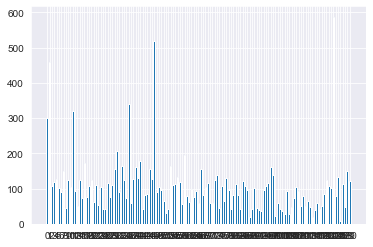

Top 10 Malignant [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.03125, 0.03571428571428571, 0.047619047619047616, 0.04819277108433735] Top 10 Benign [0.9470198675496688, 0.9482758620689655, 0.9642857142857143, 0.9666666666666667, 0.972972972972973, 0.9761904761904762, 0.98989898989899, 1.0, 1.0, 1.0]
66.6% of one class 101 Proportion 0.7709923664122137
75% of one class 83 Proportion 0.6335877862595419
min 36 0.0
max 64 1.0
min 74 0.0
max 88 1.0
min 92 0.0
max 105 1.0
min 114 0.0
min 119 0.0
min 126 0.0
[126, 105] 126 105
chosen cluster ids [126, 105, 129, 58, 96]
Most Benign Cluster


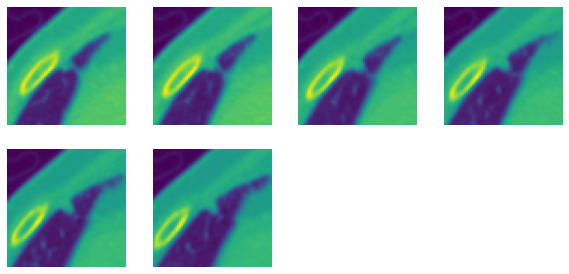

['0617_NI000_slice000.npy', '0617_NI000_slice001.npy', '0617_NI000_slice002.npy', '0617_NI000_slice003.npy', '0617_NI000_slice004.npy', '0617_NI000_slice005.npy']


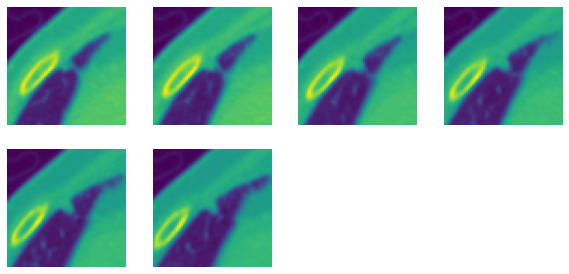

['0617_NI000_slice000.npy', '0617_NI000_slice001.npy', '0617_NI000_slice002.npy', '0617_NI000_slice003.npy', '0617_NI000_slice004.npy', '0617_NI000_slice005.npy']
Most Malignant Cluster


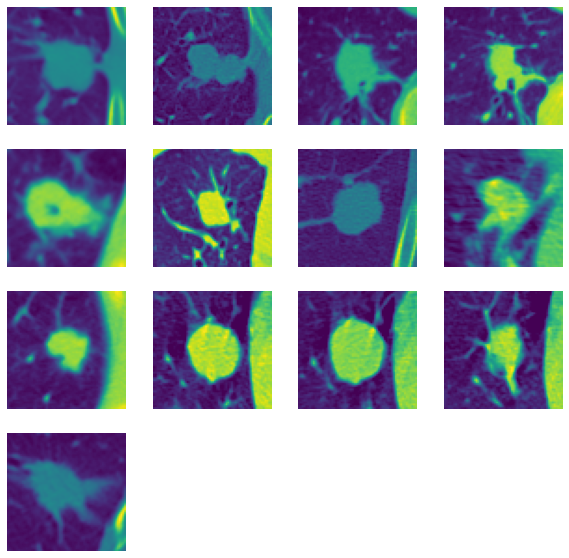

['0053_NI000_slice003.npy', '0058_NI002_slice004.npy', '0080_NI001_slice012.npy', '0080_NI001_slice014.npy', '0132_NI003_slice002.npy', '0314_NI000_slice007.npy', '0546_NI000_slice005.npy', '0688_NI002_slice013.npy', '0798_NI002_slice002.npy', '0869_NI001_slice005.npy', '0869_NI001_slice007.npy', '0869_NI001_slice016.npy', '1007_NI001_slice007.npy']


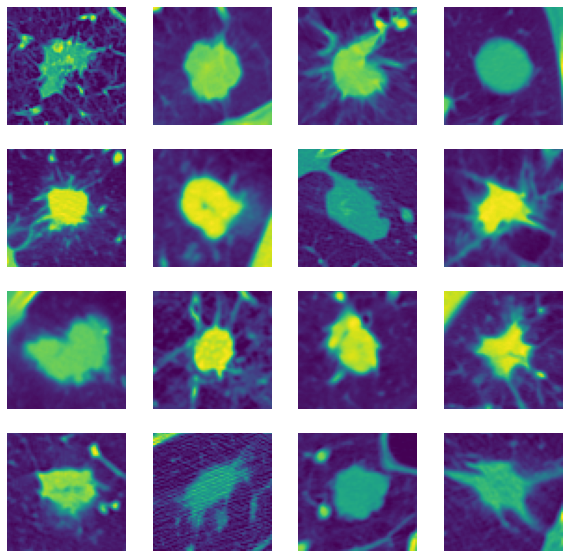

['0007_NI000_slice009.npy', '0044_NI002_slice005.npy', '0050_NI000_slice006.npy', '0064_NI000_slice007.npy', '0075_NI001_slice014.npy', '0132_NI003_slice003.npy', '0141_NI000_slice022.npy', '0332_NI000_slice009.npy', '0436_NI000_slice009.npy', '0606_NI000_slice009.npy', '0749_NI004_slice002.npy', '0773_NI005_slice003.npy', '0775_NI001_slice008.npy', '0796_NI000_slice005.npy', '1002_NI002_slice006.npy', '1007_NI001_slice006.npy']


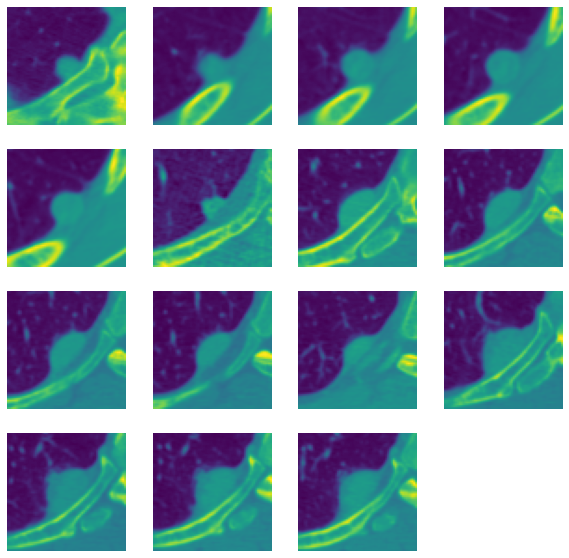

['0368_NI005_slice003.npy', '0583_NI019_slice003.npy', '0583_NI019_slice005.npy', '0583_NI019_slice007.npy', '0583_NI019_slice009.npy', '0733_NI005_slice005.npy', '0912_NI006_slice006.npy', '0912_NI006_slice011.npy', '0912_NI006_slice012.npy', '0912_NI006_slice013.npy', '0912_NI006_slice016.npy', '0912_NI006_slice031.npy', '0912_NI006_slice033.npy', '0912_NI006_slice034.npy', '0912_NI006_slice035.npy']


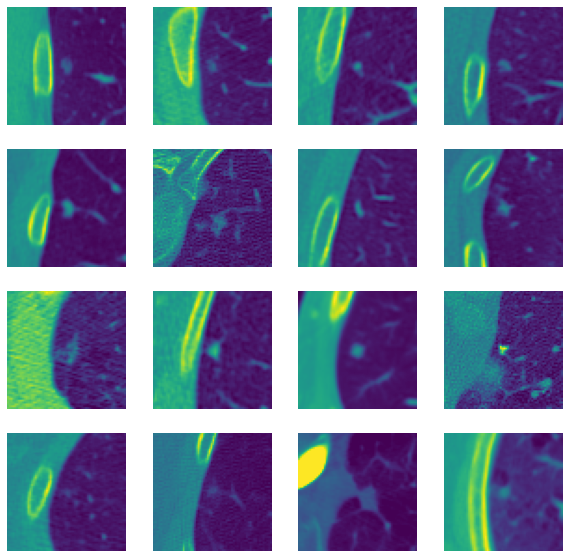

['0076_NI001_slice002.npy', '0280_NI000_slice000.npy', '0344_NI000_slice003.npy', '0345_NI001_slice000.npy', '0400_NI000_slice001.npy', '0415_NI007_slice007.npy', '0424_NI002_slice001.npy', '0444_NI000_slice001.npy', '0553_NI001_slice023.npy', '0569_NI001_slice001.npy', '0583_NI013_slice003.npy', '0649_NI010_slice001.npy', '0669_NI000_slice000.npy', '0762_NI001_slice005.npy', '0921_NI004_slice008.npy', '0998_NI008_slice002.npy']


In [66]:
kmeans_dirichlet = KMeans(n_clusters=131)
kmeans_dirichlet.fit(mus_dirichlet_new)
kmeans_dirichlet_dict = {i: np.where(kmeans_dirichlet.labels_ == i)[0] for i in range(kmeans_dirichlet.n_clusters)}

cluster_sizes(kmeans_dirichlet_dict)
patient_proportions(kmeans_dirichlet_dict)
plot_cluster_distribution(kmeans_dirichlet_dict)
proportions = get_malignant_proportions(kmeans_dirichlet_dict,1)
malignancy_proportion_stats(proportions)

print_random_cluster_sample(kmeans_dirichlet_dict, "kmeans_dirichlet", proportions)

CLASSIX(sorting='pca', radius=0.1262777777777778, minPts=10, group_merging='distance')
The 13852 data points were aggregated into 8356 groups.
In total 14444794 comparisons were required (1042.79 comparisons per data point). 
The 8356 groups were merged into 4403 clusters with the following sizes: 
      * cluster 0 : 2943
      * cluster 1 : 157
      * cluster 2 : 113
      * cluster 3 : 104
      * cluster 4 : 83
      * cluster 5 : 74
      * cluster 6 : 66
      * cluster 7 : 59
      * cluster 8 : 52
      * cluster 9 : 47
      * cluster 10 : 46
      * cluster 11 : 44
      * cluster 12 : 42
      * cluster 13 : 37
      * cluster 14 : 37
      * cluster 15 : 34
      * cluster 16 : 34
      * cluster 17 : 34
      * cluster 18 : 32
      * cluster 19 : 32
      * cluster 20 : 31
      * cluster 21 : 30
      * cluster 22 : 29
      * cluster 23 : 29
      * cluster 24 : 28
      * cluster 25 : 28
      * cluster 26 : 27
      * cluster 27 : 26
      * cluster 28 : 26
      * c

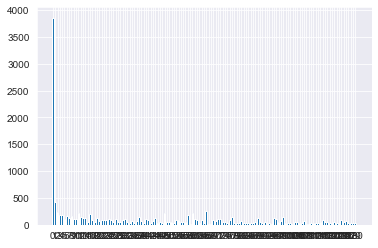

Top 10 Malignant [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0] Top 10 Benign [0.967741935483871, 0.9714285714285714, 0.9736842105263158, 0.9857142857142858, 0.9873417721518988, 1.0, 1.0, 1.0, 1.0, 1.0]
66.6% of one class 115 Proportion 0.8778625954198473
75% of one class 101 Proportion 0.7709923664122137
min 29 0.0
max 39 1.0
min 52 0.0
max 62 1.0
max 67 1.0
min 68 0.0
max 73 1.0
min 74 0.0
min 85 0.0
min 100 0.0
min 110 0.0
min 119 0.0
min 123 0.0
min 125 0.0
max 127 1.0
[125, 127] 125 127
chosen cluster ids [125, 127, 66, 14, 59]
Most Benign Cluster


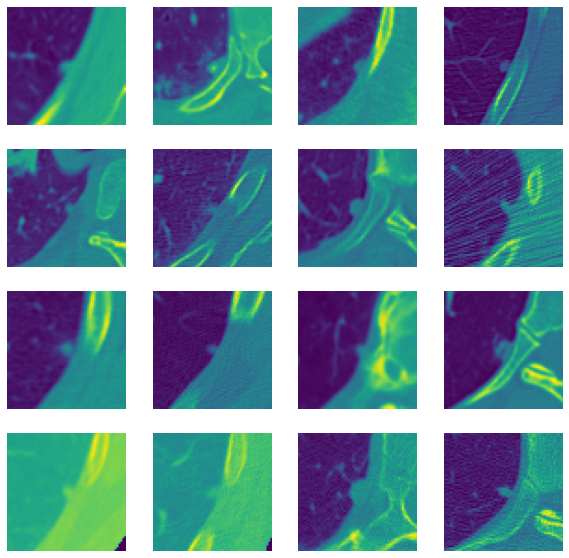

['0005_NI002_slice000.npy', '0039_NI003_slice001.npy', '0102_NI000_slice001.npy', '0160_NI003_slice000.npy', '0192_NI004_slice003.npy', '0285_NI000_slice003.npy', '0323_NI000_slice001.npy', '0339_NI001_slice001.npy', '0381_NI000_slice001.npy', '0473_NI002_slice002.npy', '0583_NI006_slice001.npy', '0775_NI005_slice002.npy', '0838_NI002_slice006.npy', '0866_NI001_slice000.npy', '0880_NI002_slice001.npy', '0894_NI003_slice001.npy']


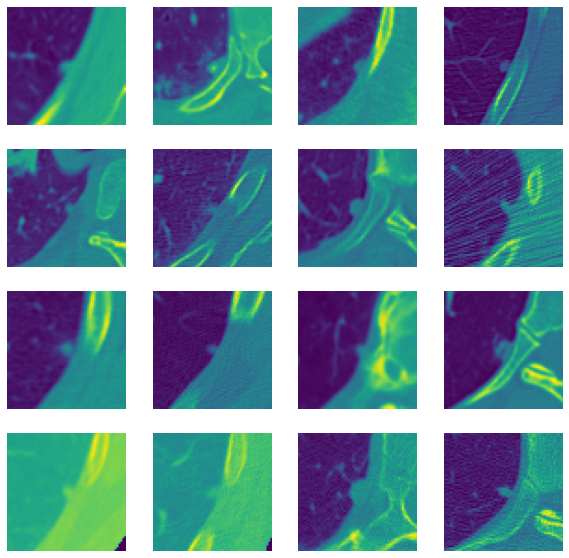

['0005_NI002_slice000.npy', '0039_NI003_slice001.npy', '0102_NI000_slice001.npy', '0160_NI003_slice000.npy', '0192_NI004_slice003.npy', '0285_NI000_slice003.npy', '0323_NI000_slice001.npy', '0339_NI001_slice001.npy', '0381_NI000_slice001.npy', '0473_NI002_slice002.npy', '0583_NI006_slice001.npy', '0775_NI005_slice002.npy', '0838_NI002_slice006.npy', '0866_NI001_slice000.npy', '0880_NI002_slice001.npy', '0894_NI003_slice001.npy']
Most Malignant Cluster


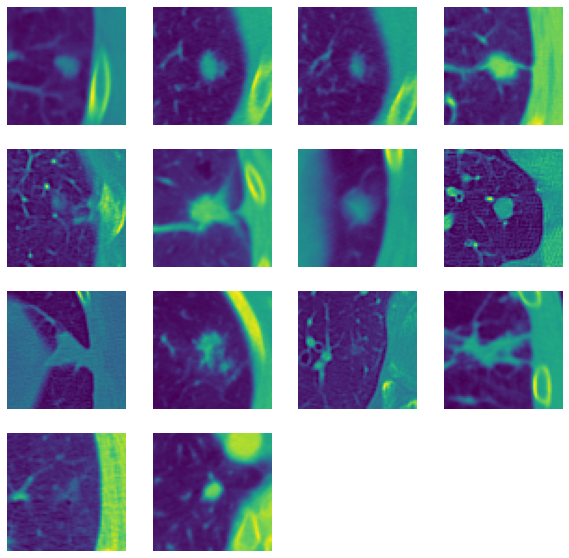

['0018_NI001_slice001.npy', '0031_NI004_slice006.npy', '0031_NI004_slice007.npy', '0054_NI000_slice005.npy', '0058_NI002_slice007.npy', '0060_NI001_slice002.npy', '0154_NI001_slice001.npy', '0160_NI001_slice001.npy', '0163_NI000_slice003.npy', '0187_NI003_slice000.npy', '0217_NI000_slice006.npy', '0529_NI000_slice015.npy', '0681_NI000_slice001.npy', '0749_NI005_slice001.npy']


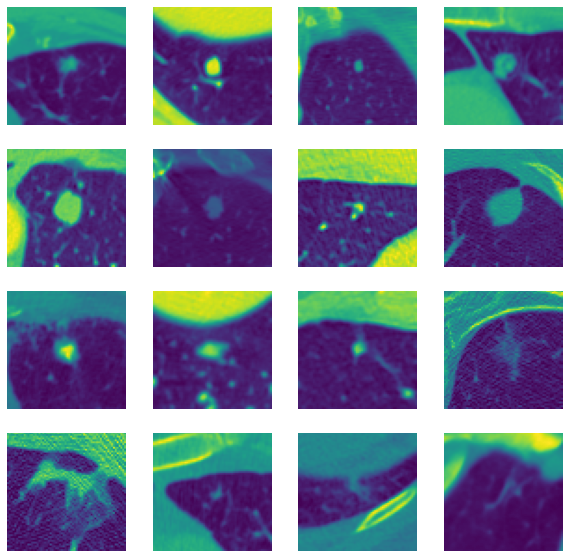

['0003_NI002_slice001.npy', '0011_NI000_slice002.npy', '0020_NI001_slice004.npy', '0045_NI011_slice002.npy', '0129_NI001_slice006.npy', '0164_NI010_slice005.npy', '0300_NI001_slice014.npy', '0423_NI000_slice011.npy', '0440_NI001_slice003.npy', '0651_NI000_slice003.npy', '0655_NI003_slice004.npy', '0785_NI003_slice004.npy', '0790_NI001_slice009.npy', '0806_NI001_slice004.npy', '0906_NI000_slice000.npy', '0962_NI001_slice001.npy']


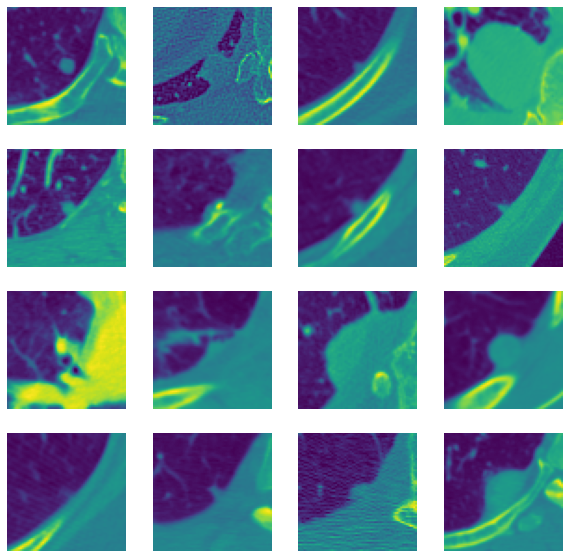

['0129_NI006_slice002.npy', '0133_NI000_slice006.npy', '0148_NI000_slice000.npy', '0166_NI000_slice005.npy', '0192_NI003_slice003.npy', '0309_NI002_slice003.npy', '0356_NI003_slice000.npy', '0408_NI000_slice000.npy', '0414_NI000_slice004.npy', '0534_NI000_slice001.npy', '0576_NI000_slice016.npy', '0583_NI019_slice006.npy', '0666_NI000_slice002.npy', '0750_NI003_slice000.npy', '0871_NI005_slice001.npy', '0912_NI006_slice035.npy']


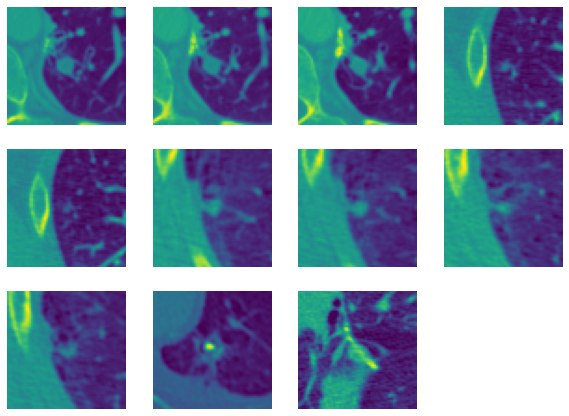

['0056_NI000_slice003.npy', '0056_NI000_slice004.npy', '0056_NI000_slice005.npy', '0176_NI001_slice000.npy', '0176_NI001_slice001.npy', '0469_NI003_slice004.npy', '0469_NI003_slice006.npy', '0469_NI003_slice010.npy', '0469_NI003_slice013.npy', '0825_NI000_slice005.npy', '0875_NI000_slice002.npy']


In [55]:
clx_mus_dirichlet = CLASSIX(radius=0.1262777777777778, verbose=1, minPts=10)
clx_mus_dirichlet.fit(mus_dirichlet_new)

classix_dirichlet_dict = {i: np.where(clx_mus_dirichlet.labels_ == i)[0] for i in range(len(np.unique(clx_mus_dirichlet.labels_)))}

cluster_sizes(classix_dirichlet_dict)
patient_proportions(classix_dirichlet_dict)
plot_cluster_distribution(classix_dirichlet_dict)
proportions = get_malignant_proportions(classix_dirichlet_dict,1)
malignancy_proportion_stats(proportions)

print_random_cluster_sample(classix_dirichlet_dict, "dirichlet", proportions)

## Gaussian Clustering Final

Number of Clusters 131
139 patients are in only 1 cluster proportion 0.15885714285714286
318 patients are at least 50% in 1 cluster proportion 0.36342857142857143
708 patients are at least 25% in 1 cluster proportion 0.8091428571428572
645 patients are at least 50% across 2 clusters proportion 0.7371428571428571


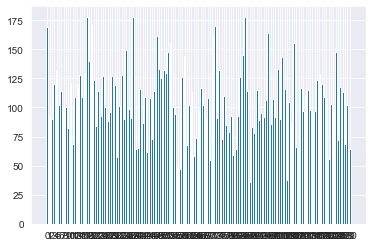

Top 10 Malignant [0.0, 0.0, 0.010752688172043012, 0.013888888888888888, 0.016666666666666666, 0.019417475728155338, 0.02702702702702703, 0.02702702702702703, 0.030612244897959183, 0.03333333333333333] Top 10 Benign [0.9772727272727273, 0.98, 0.9803921568627451, 0.984251968503937, 0.9846153846153847, 0.9855072463768116, 1.0, 1.0, 1.0, 1.0]
66.6% of one class 117 Proportion 0.8931297709923665
75% of one class 103 Proportion 0.7862595419847328
max 7 1.0
min 57 0.0
max 91 1.0
min 100 0.0
max 103 1.0
max 130 1.0
[100, 130] 100 130
chosen cluster ids [100, 130, 117, 72, 15]
Most Benign Cluster


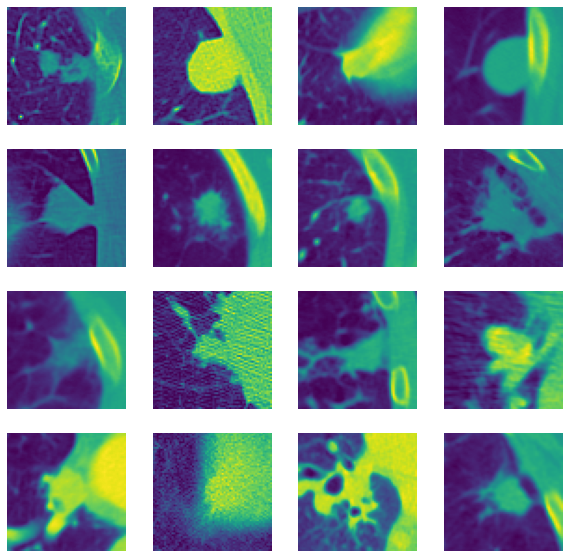

['0058_NI002_slice006.npy', '0095_NI000_slice007.npy', '0112_NI000_slice000.npy', '0154_NI001_slice004.npy', '0163_NI000_slice005.npy', '0187_NI003_slice001.npy', '0221_NI000_slice008.npy', '0311_NI000_slice011.npy', '0368_NI000_slice001.npy', '0466_NI001_slice002.npy', '0529_NI000_slice011.npy', '0688_NI002_slice011.npy', '0749_NI002_slice004.npy', '0919_NI000_slice000.npy', '0978_NI000_slice026.npy', '1004_NI002_slice018.npy']


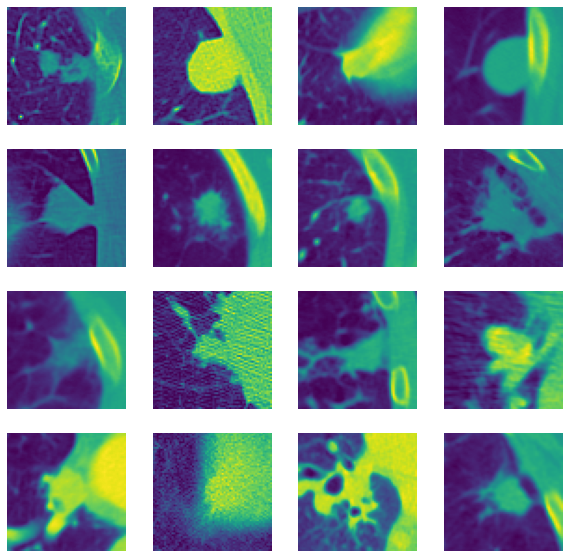

['0058_NI002_slice006.npy', '0095_NI000_slice007.npy', '0112_NI000_slice000.npy', '0154_NI001_slice004.npy', '0163_NI000_slice005.npy', '0187_NI003_slice001.npy', '0221_NI000_slice008.npy', '0311_NI000_slice011.npy', '0368_NI000_slice001.npy', '0466_NI001_slice002.npy', '0529_NI000_slice011.npy', '0688_NI002_slice011.npy', '0749_NI002_slice004.npy', '0919_NI000_slice000.npy', '0978_NI000_slice026.npy', '1004_NI002_slice018.npy']
Most Malignant Cluster


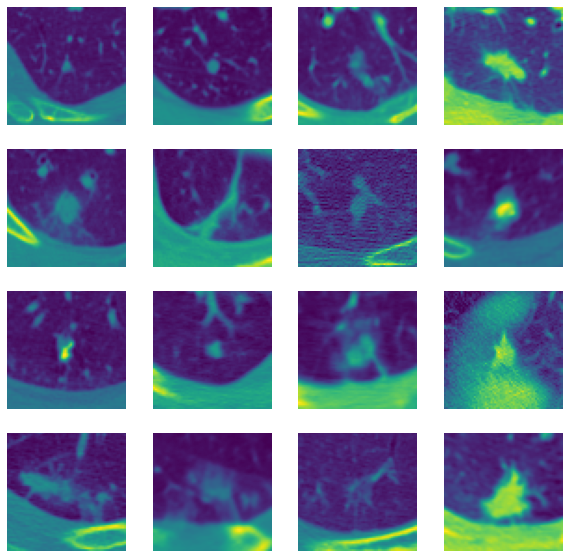

['0010_NI002_slice001.npy', '0124_NI014_slice001.npy', '0139_NI002_slice000.npy', '0148_NI002_slice002.npy', '0171_NI000_slice003.npy', '0421_NI000_slice001.npy', '0458_NI002_slice002.npy', '0469_NI000_slice003.npy', '0486_NI000_slice002.npy', '0526_NI004_slice001.npy', '0595_NI000_slice007.npy', '0620_NI000_slice000.npy', '0703_NI001_slice011.npy', '0751_NI006_slice008.npy', '0811_NI000_slice000.npy', '1003_NI004_slice007.npy']


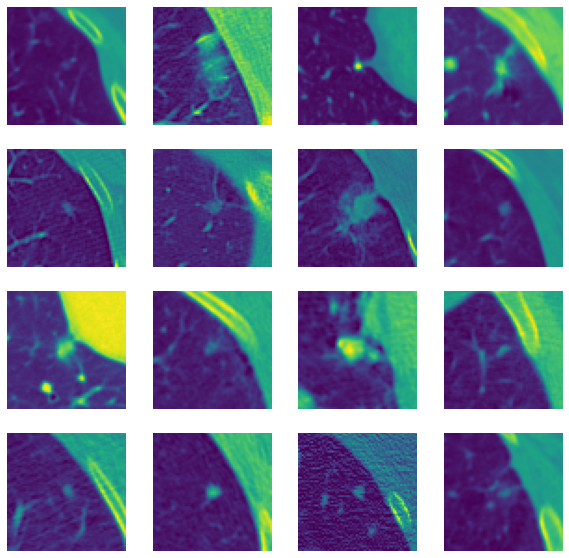

['0012_NI007_slice000.npy', '0095_NI000_slice001.npy', '0118_NI002_slice002.npy', '0136_NI006_slice001.npy', '0201_NI006_slice000.npy', '0228_NI000_slice004.npy', '0240_NI004_slice001.npy', '0255_NI001_slice000.npy', '0334_NI002_slice002.npy', '0362_NI000_slice001.npy', '0688_NI001_slice006.npy', '0728_NI000_slice001.npy', '0858_NI004_slice004.npy', '0933_NI003_slice001.npy', '0959_NI000_slice001.npy', '1004_NI002_slice026.npy']


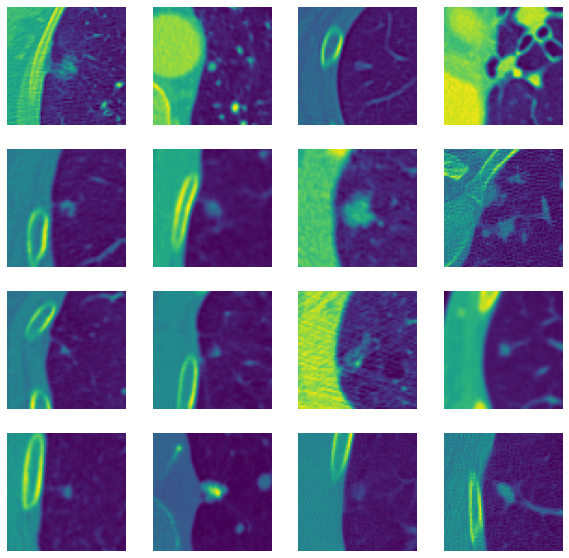

['0116_NI001_slice006.npy', '0129_NI002_slice001.npy', '0208_NI002_slice002.npy', '0298_NI001_slice002.npy', '0345_NI001_slice002.npy', '0356_NI004_slice000.npy', '0362_NI001_slice003.npy', '0415_NI007_slice008.npy', '0444_NI000_slice003.npy', '0452_NI000_slice000.npy', '0553_NI001_slice020.npy', '0583_NI013_slice001.npy', '0655_NI001_slice000.npy', '0770_NI000_slice005.npy', '0832_NI001_slice000.npy', '0915_NI000_slice002.npy']


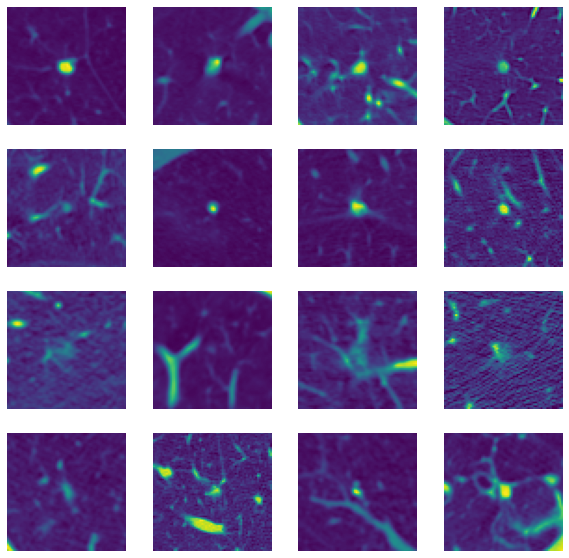

['0021_NI002_slice003.npy', '0044_NI001_slice003.npy', '0113_NI000_slice001.npy', '0233_NI001_slice000.npy', '0308_NI001_slice010.npy', '0375_NI000_slice005.npy', '0427_NI000_slice004.npy', '0464_NI000_slice002.npy', '0474_NI002_slice002.npy', '0583_NI011_slice003.npy', '0678_NI000_slice003.npy', '0769_NI000_slice001.npy', '0807_NI004_slice001.npy', '0820_NI000_slice002.npy', '0863_NI001_slice004.npy', '0874_NI000_slice022.npy']


In [65]:
kmeans_gaussian = KMeans(n_clusters=131)
kmeans_gaussian.fit(mus_new)
kmeans_gaussian_dict = {i: np.where(kmeans_gaussian.labels_ == i)[0] for i in range(kmeans_gaussian.n_clusters)}

cluster_sizes(kmeans_gaussian_dict)
patient_proportions(kmeans_gaussian_dict)
plot_cluster_distribution(kmeans_gaussian_dict)
proportions = get_malignant_proportions(kmeans_gaussian_dict,1)
malignancy_proportion_stats(proportions)

print_random_cluster_sample(kmeans_dirichlet_dict, "kmeans_gaussian", proportions)

CLASSIX(sorting='pca', radius=0.3953, minPts=10, group_merging='distance')
The 13852 data points were aggregated into 10403 groups.
In total 55236945 comparisons were required (3987.65 comparisons per data point). 
The 10403 groups were merged into 5521 clusters with the following sizes: 
      * cluster 0 : 47
      * cluster 1 : 43
      * cluster 2 : 26
      * cluster 3 : 26
      * cluster 4 : 25
      * cluster 5 : 23
      * cluster 6 : 22
      * cluster 7 : 22
      * cluster 8 : 22
      * cluster 9 : 22
      * cluster 10 : 22
      * cluster 11 : 22
      * cluster 12 : 21
      * cluster 13 : 21
      * cluster 14 : 20
      * cluster 15 : 19
      * cluster 16 : 19
      * cluster 17 : 19
      * cluster 18 : 19
      * cluster 19 : 19
      * cluster 20 : 18
      * cluster 21 : 18
      * cluster 22 : 18
      * cluster 23 : 17
      * cluster 24 : 17
      * cluster 25 : 16
      * cluster 26 : 16
      * cluster 27 : 16
      * cluster 28 : 15
      * cluster 29 : 15


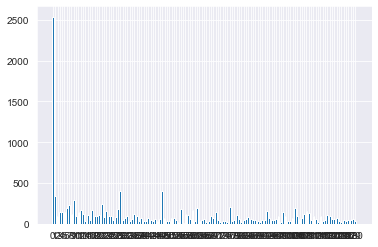

Top 10 Malignant [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.02564102564102564, 0.03225806451612903, 0.034482758620689655, 0.034482758620689655] Top 10 Benign [0.9108910891089109, 0.9130434782608695, 0.9245283018867925, 0.9259259259259259, 0.9333333333333333, 0.9411764705882353, 0.9545454545454546, 0.9583333333333334, 0.967741935483871, 0.967741935483871]
66.6% of one class 108 Proportion 0.8244274809160306
75% of one class 89 Proportion 0.6793893129770993
max 39 0.967741935483871
min 56 0.0
min 72 0.0
min 73 0.0
min 87 0.0
min 98 0.0
max 102 0.967741935483871
min 130 0.0
[130, 102] 130 102
chosen cluster ids [130, 102, 47, 125, 69]
Most Benign Cluster


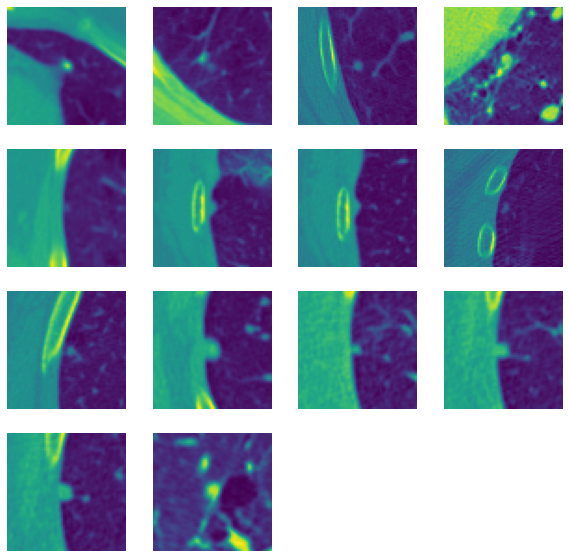

['0167_NI001_slice000.npy', '0335_NI002_slice003.npy', '0501_NI000_slice001.npy', '0601_NI002_slice001.npy', '0641_NI007_slice000.npy', '0742_NI000_slice000.npy', '0742_NI000_slice002.npy', '0820_NI002_slice001.npy', '0898_NI001_slice000.npy', '0973_NI001_slice005.npy', '0985_NI000_slice001.npy', '0985_NI000_slice003.npy', '0985_NI000_slice005.npy', '1003_NI003_slice003.npy']


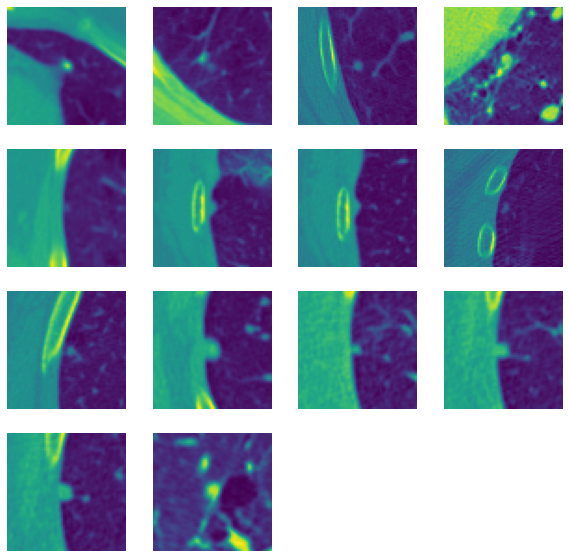

['0167_NI001_slice000.npy', '0335_NI002_slice003.npy', '0501_NI000_slice001.npy', '0601_NI002_slice001.npy', '0641_NI007_slice000.npy', '0742_NI000_slice000.npy', '0742_NI000_slice002.npy', '0820_NI002_slice001.npy', '0898_NI001_slice000.npy', '0973_NI001_slice005.npy', '0985_NI000_slice001.npy', '0985_NI000_slice003.npy', '0985_NI000_slice005.npy', '1003_NI003_slice003.npy']
Most Malignant Cluster


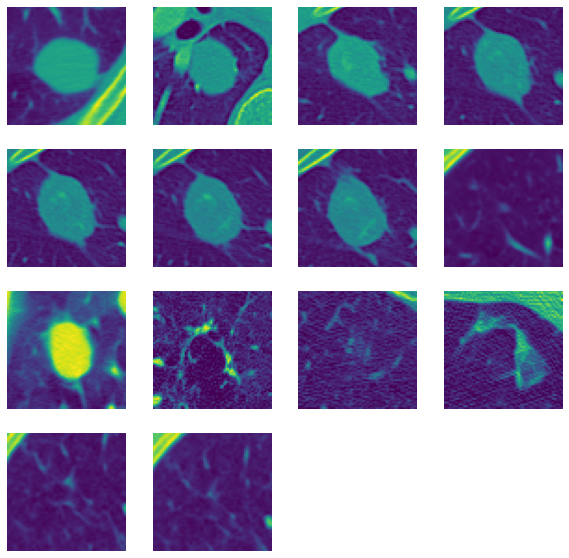

['0061_NI005_slice003.npy', '0077_NI000_slice007.npy', '0141_NI000_slice024.npy', '0141_NI000_slice028.npy', '0141_NI000_slice029.npy', '0141_NI000_slice030.npy', '0141_NI000_slice032.npy', '0185_NI004_slice002.npy', '0526_NI005_slice003.npy', '0701_NI003_slice002.npy', '0785_NI004_slice000.npy', '0790_NI001_slice005.npy', '0806_NI007_slice007.npy', '0806_NI007_slice008.npy']


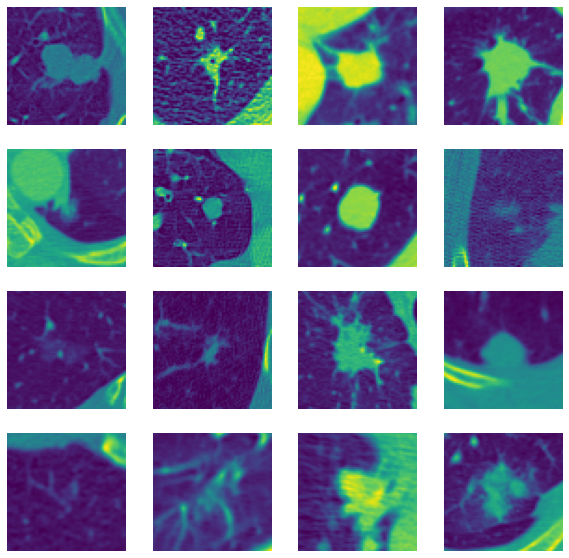

['0058_NI002_slice004.npy', '0066_NI001_slice014.npy', '0078_NI000_slice003.npy', '0080_NI001_slice007.npy', '0128_NI002_slice002.npy', '0160_NI001_slice001.npy', '0172_NI000_slice004.npy', '0262_NI000_slice006.npy', '0388_NI004_slice002.npy', '0450_NI007_slice001.npy', '0454_NI006_slice013.npy', '0484_NI000_slice004.npy', '0525_NI003_slice001.npy', '0595_NI000_slice000.npy', '0688_NI002_slice010.npy', '0772_NI000_slice013.npy']


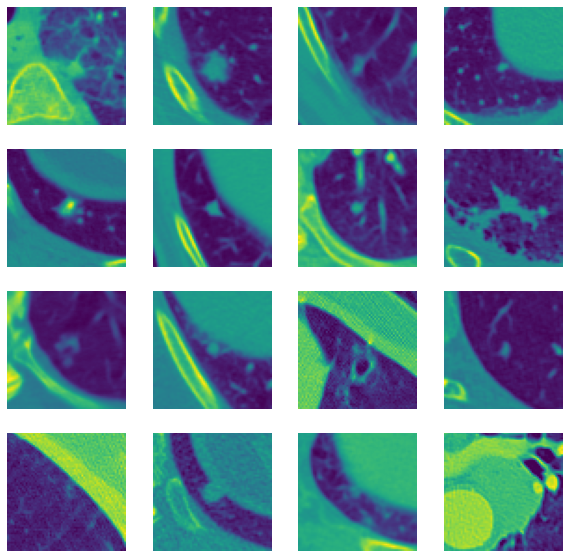

['0033_NI001_slice001.npy', '0043_NI002_slice005.npy', '0084_NI001_slice000.npy', '0091_NI000_slice001.npy', '0144_NI001_slice001.npy', '0185_NI000_slice002.npy', '0188_NI002_slice000.npy', '0325_NI000_slice013.npy', '0346_NI001_slice001.npy', '0398_NI001_slice003.npy', '0571_NI001_slice000.npy', '0674_NI002_slice000.npy', '0747_NI000_slice002.npy', '0902_NI000_slice010.npy', '0976_NI000_slice001.npy', '1009_NI000_slice005.npy']


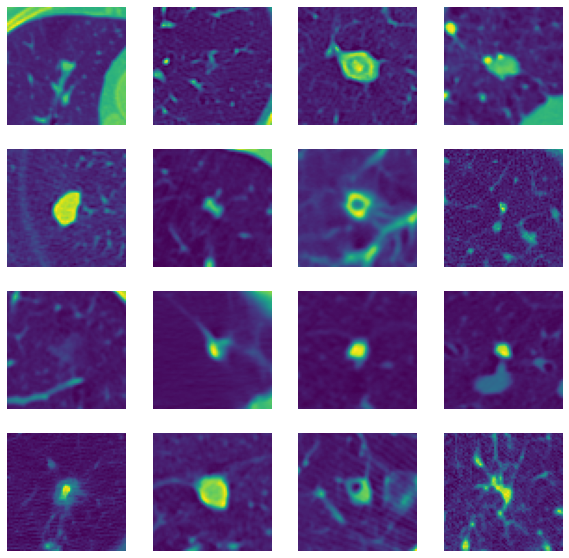

['0039_NI004_slice005.npy', '0077_NI001_slice000.npy', '0119_NI000_slice005.npy', '0199_NI003_slice007.npy', '0300_NI002_slice007.npy', '0309_NI000_slice001.npy', '0378_NI000_slice001.npy', '0649_NI002_slice002.npy', '0659_NI002_slice001.npy', '0709_NI005_slice000.npy', '0717_NI000_slice005.npy', '0726_NI001_slice004.npy', '0800_NI001_slice005.npy', '0807_NI003_slice007.npy', '0874_NI000_slice016.npy', '0919_NI000_slice009.npy']


In [63]:
clx_mus_gaussian = CLASSIX(radius=0.3953, verbose=1, minPts=10)
clx_mus_gaussian.fit(mus_new)

classix_gaussian_dict = {i: np.where(clx_mus_gaussian.labels_ == i)[0] for i in range(len(np.unique(clx_mus_gaussian.labels_)))}

cluster_sizes(classix_gaussian_dict)
patient_proportions(classix_gaussian_dict)
plot_cluster_distribution(classix_gaussian_dict)
proportions = get_malignant_proportions(classix_gaussian_dict,1)
malignancy_proportion_stats(proportions)

print_random_cluster_sample(classix_gaussian_dict, "gaussian", proportions)

[0.99999994 2.        ]
[1.02 2.03]
[1.04 2.06]
[1.06 2.09]
[1.0799999 2.12     ]
[1.0999999 2.15     ]
[1.1199999 2.18     ]
[1.14 2.21]
[1.16 2.24]
[1.18 2.27]
[1.1999999 2.3      ]
[1.2199999 2.33     ]
[1.2399999 2.36     ]
[1.26      2.3899999]
[1.28 2.42]
[1.3  2.45]
[1.3199999 2.48     ]
[1.3399999 2.51     ]
[1.3599999 2.54     ]
[1.3799999 2.57     ]
[1.4 2.6]
[1.42 2.63]
[1.4399999 2.6599998]
[1.4599999 2.69     ]
[1.4799999 2.72     ]
[1.5  2.75]
[1.52 2.78]
[1.54 2.81]
[1.56      2.8400002]
[1.5799999 2.87     ]
[1.5999999 2.9      ]
[1.6199999 2.93     ]
[1.6399999 2.96     ]
[1.66 2.99]
[1.68 3.02]
[1.6999999 3.05     ]
[1.72 3.08]
[1.74      3.1100001]
[1.76      3.1399999]
[1.78 3.17]
[1.8 3.2]
[1.8199999 3.23     ]
[1.8399999 3.26     ]
[1.8599999 3.29     ]
[1.8799999 3.32     ]
[1.8999999 3.35     ]
[1.92 3.38]
[1.9399999 3.4099998]
[1.9599999 3.44     ]
[1.98 3.47]
[2.  3.5]
[2.02 3.53]
[2.04 3.56]
[2.06 3.59]
[2.08      3.6200001]
[2.1  3.65]
[2.12 3.68]
[2.1399999

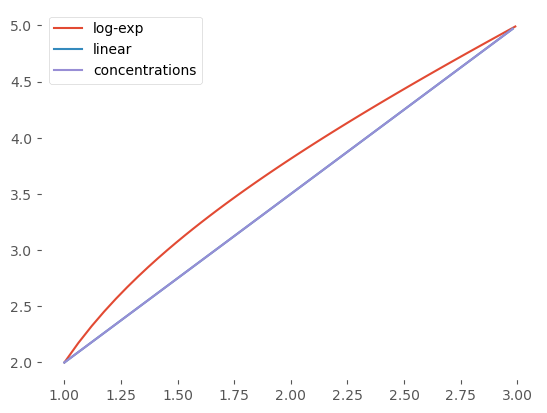

In [406]:
import torch
a = np.array([1,2])
b = np.array([3,5])
data1, data2, data3 = np.zeros((100,2)), np.zeros((100,2)), np.zeros((100,2))
for t in range(0,100):
    data1[t] = np.log(np.exp(a) + 0.01*t*(np.exp(b)- np.exp(a)))
    data2[t] = a + 0.01*t*(b-a)
    c = torch.exp(torch.tensor(a))
    c = torch.clamp(c, min=1e-10, max=1e10)
    c = torch.log(c)
    c = np.array(c)
    d = torch.exp(torch.tensor(b))
    d = torch.clamp(d, min=1e-10, max=1e10)
    d = torch.log(d)
    d = np.array(d)
    data3[t] = c + 0.01*t*(d-c)
    print(c + 0.01*t*(d-c))

x1 = [d[0] for d in data1]
y1 = [d[1] for d in data1]
x2 = [d[0] for d in data2]
y2 = [d[1] for d in data2]
x3 = [d[0] for d in data3]
y3 = [d[1] for d in data3]

# Create plot with two lines on same axis
plt.plot(x1, y1, label='log-exp')
plt.plot(x2, y2, label='linear')
plt.plot(x3, y3, label='concentrations')

plt.legend()
plt.show()